# Tâche n°6 : Analyse du sprectre de diffraction 

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

with MPRester("yDHrTj9RRkoKjTjOFwD0btKpsIOcE65N") as m:
    structure = m.get_structure_by_material_id("mp-20072")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

1. Calcul et visualisation du spectre de diffraction

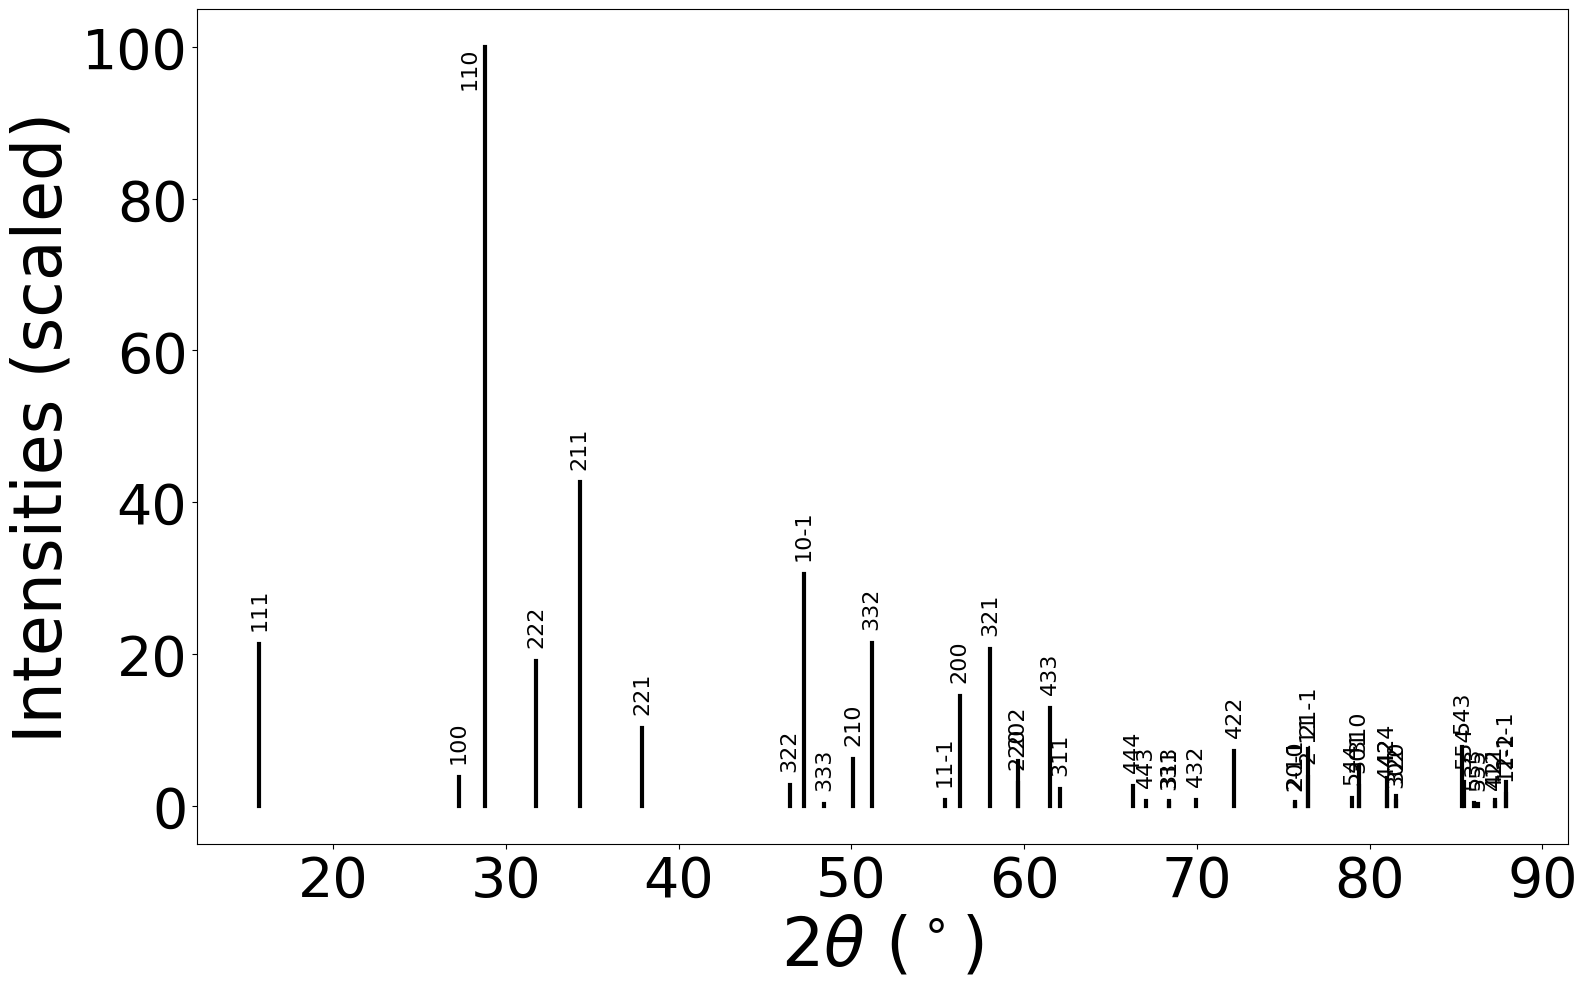

In [2]:
#Ici, on utilise la longueur d'onde du rayonnement Cu Ka qui est égale à 1.5406 Å 
xrd = XRDCalculator(wavelength=1.5406)

# La méthode get_pattern(structure) renvoie un objet contenant :
#  - pattern.x : la liste des angles 2θ
#  - pattern.y : la liste des intensités correspondantes
#  - pattern.hkls : les indices de Miller (hkl) associés aux pics
pattern = xrd.get_pattern(structure)

ax = xrd.get_plot(structure)
plt.show()



2. Analyse des 3 premiers pics de diffraction XRD

 Dans cette section, on va déterminer l'angle 2θ, l'intensité ainsi que l'indice hkl et la multiplicité de nos 3 premiers pics
 
 - Angle 2θ : Correspond à l'angle de diffraction mesuré dans l'expérience XRD. Il est lié à la distance inter-planaire d_{hkl} par la loi de Bragg : nλ = 2d sin(θ). Chaque pic XRD apparaît à un angle spécifique 2θ lorsque la diffraction est constructive
 
 - Intensité : Représente la quantité de rayons X réfléchis par un ensemble de plans (hkl). Une intensité élevée indique un plan qui contribue fortement à la diffraction.
 
 - Indices de Miller (hkl) : Définissent les plans cristallographiques responsables de la diffraction. Chaque pic XRD est associé à un plan (hkl) qui satisfait la condition de Bragg.
 
 - Multiplicité : Indique le nombre de plans équivalents dans la structure cristalline.

In [3]:
n_peaks = 3  # Nombre de pics à analyser
print("=== Les 3 premiers pics de diffraction ===")
for i in range(n_peaks):
    angle_2theta = pattern.x[i]
    intensite = pattern.y[i]
    hkl_info = pattern.hkls[i]
    print(f"Pic n° {i+1} :")
    print(f"  - Angle 2θ = {angle_2theta:.2f}°")
    print(f"  - Intensité = {intensite:.2f} %")
    print(f"  - Indices hkl = {hkl_info}")
    if i == 0 or i == 1:
        print("-" * 30)

=== Les 3 premiers pics de diffraction ===
Pic n° 1 :
  - Angle 2θ = 15.72°
  - Intensité = 21.30 %
  - Indices hkl = [{'hkl': (1, 1, 1), 'multiplicity': 2}]
------------------------------
Pic n° 2 :
  - Angle 2θ = 27.27°
  - Intensité = 3.81 %
  - Indices hkl = [{'hkl': (1, 0, 0), 'multiplicity': 6}]
------------------------------
Pic n° 3 :
  - Angle 2θ = 28.79°
  - Intensité = 100.00 %
  - Indices hkl = [{'hkl': (1, 1, 0), 'multiplicity': 6}]
